<a href="https://colab.research.google.com/github/Grandes/DeepLearningwithPython_keras/blob/master/Practice_4chapter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
original_model.add(layers.Dense(16, activation = 'relu'))
original_model.add(layers.Dense(1, activation = 'sigmoid'))

original_model.compile(optimizer = 'rmsprop',
                     loss = 'binary_crossentropy',
                     metrics = ['acc'])

In [0]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [21]:
original_hist = original_model.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 140us/step - loss: 0.4538 - acc: 0.8167 - val_loss: 0.3569 - val_acc: 0.8669
Epoch 2/20
25000/25000 [==============================] - 3s 137us/step - loss: 0.2598 - acc: 0.9110 - val_loss: 0.2913 - val_acc: 0.8872
Epoch 3/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.1994 - acc: 0.9308 - val_loss: 0.3084 - val_acc: 0.8755
Epoch 4/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.1712 - acc: 0.9394 - val_loss: 0.3148 - val_acc: 0.8756
Epoch 5/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.1457 - acc: 0.9506 - val_loss: 0.3125 - val_acc: 0.8806
Epoch 6/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.1248 - acc: 0.9584 - val_loss: 0.3396 - val_acc: 0.8722
Epoch 7/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.1106 - acc: 0.9634 - val_loss: 0.3525 - 

In [8]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 141us/step - loss: 0.5670 - acc: 0.7410 - val_loss: 0.4849 - val_acc: 0.8256
Epoch 2/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.3924 - acc: 0.8895 - val_loss: 0.3609 - val_acc: 0.8780
Epoch 3/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.2791 - acc: 0.9174 - val_loss: 0.3012 - val_acc: 0.8879
Epoch 4/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.2213 - acc: 0.9278 - val_loss: 0.2823 - val_acc: 0.8900
Epoch 5/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.1877 - acc: 0.9375 - val_loss: 0.2816 - val_acc: 0.8863
Epoch 6/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.1649 - acc: 0.9448 - val_loss: 0.2858 - val_acc: 0.8856
Epoch 7/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.1467 - acc: 0.9518 - val_loss: 0.2954 - 

In [0]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

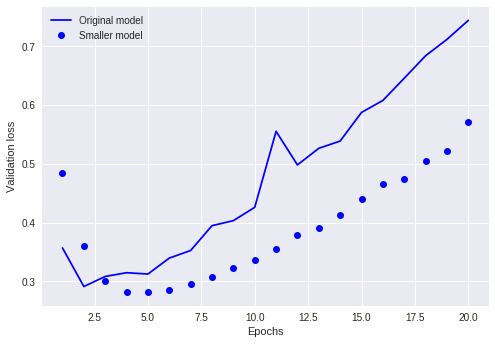

In [27]:
import matplotlib.pyplot as plt

# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [29]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 215us/step - loss: 0.5278 - acc: 0.7796 - val_loss: 0.2923 - val_acc: 0.8848
Epoch 2/20
25000/25000 [==============================] - 5s 196us/step - loss: 0.2154 - acc: 0.9152 - val_loss: 0.5000 - val_acc: 0.8070
Epoch 3/20
25000/25000 [==============================] - 5s 197us/step - loss: 0.1169 - acc: 0.9569 - val_loss: 0.3518 - val_acc: 0.8849
Epoch 4/20
25000/25000 [==============================] - 5s 197us/step - loss: 0.0517 - acc: 0.9836 - val_loss: 0.4343 - val_acc: 0.8826
Epoch 5/20
25000/25000 [==============================] - 5s 198us/step - loss: 0.0799 - acc: 0.9866 - val_loss: 0.5241 - val_acc: 0.8812
Epoch 6/20
25000/25000 [==============================] - 5s 196us/step - loss: 4.3920e-04 - acc: 1.0000 - val_loss: 0.6571 - val_acc: 0.8780
Epoch 7/20
25000/25000 [==============================] - 5s 196us/step - loss: 0.1161 - acc: 0.9898 - val_loss: 0.741

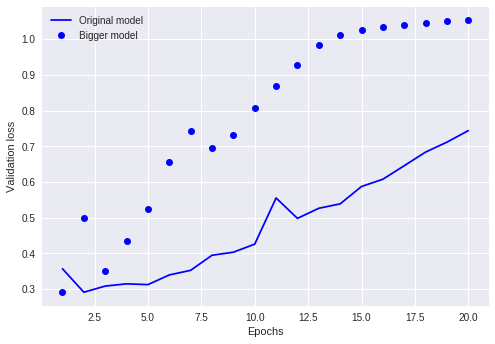

In [32]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

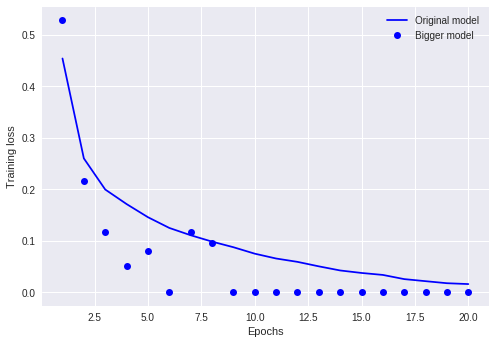

In [33]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## 가중치 규제 추가

오캄의 면도날 이론을 알고 있을지 모르겠습니다. 어떤 것에 대한 두 가지의 설명이 있다면 더 적은 가정을 필요하는 간단한 설명이 옳을 것이라는 이론입니다. 이 개념은 신경망으로 학습되는 모델에도 적용됩니다. 어떤 훈련 데이터와 네트워크 구조가 주어졌을 때 데이터를 설명할 수 있는 가중치 값의 집합은 여러 개(여러 개의 모델)입니다. 간단한 모델이 복잡한 모델보다 덜 과대적합될 가능성이 높습니다.

여기에서 간단한 모델은 파라미터 값 분포의 엔트로피가 작은 모델입니다(또는 앞 절에서 본 것처럼 적은 수의 파라미터를 가진 모델입니다). 그러므로 과대적합을 완화시키기 위한 일반적인 방법은 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 강제하는 것입니다. 가중치 값의 분포가 더 균일하게 됩니다. 이를 가중치 규제라고 하고 네트워크의 손실 함수에 큰 가중치에 연관된 비용을 추가합니다. 두 가지 형태의 비용이 있습니다.

* L1 규제 : 가중치의 절대값에 비례하는 비용이 추가됩니다(가중치의 L1 노름).
* L2 규제 : 가중치의 제곱에 비례하는 비용이 추가됩니다(가중치의 L2 노름). L2 규제는 신경망에서 가중치 감쇠라고도 부릅니다. 다른 이름 때문에 혼돈하지 마세요. 가중치 감쇠는 수학적으로 L2 규제와 동일합니다.

케라스에서 가중치 규제 인스턴스를 층의 키워드 매개변수로 전달하여 가중치 규제를 추가할 수 있습니다. 영화 리뷰 분류 네트워크에 L2 가중치 규제를 추가해 보죠:

In [0]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [36]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.4844 - acc: 0.8288 - val_loss: 0.3787 - val_acc: 0.8763
Epoch 2/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.3069 - acc: 0.9058 - val_loss: 0.3335 - val_acc: 0.8861
Epoch 3/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.2653 - acc: 0.9203 - val_loss: 0.3456 - val_acc: 0.8781
Epoch 4/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.2418 - acc: 0.9296 - val_loss: 0.3399 - val_acc: 0.8814
Epoch 5/20
25000/25000 [==============================] - 3s 133us/step - loss: 0.2289 - acc: 0.9349 - val_loss: 0.3490 - val_acc: 0.8800
Epoch 6/20
25000/25000 [==============================] - 3s 133us/step - loss: 0.2176 - acc: 0.9398 - val_loss: 0.3647 - val_acc: 0.8760
Epoch 7/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.2116 - acc: 0.9424 - val_loss: 0.4034 - 

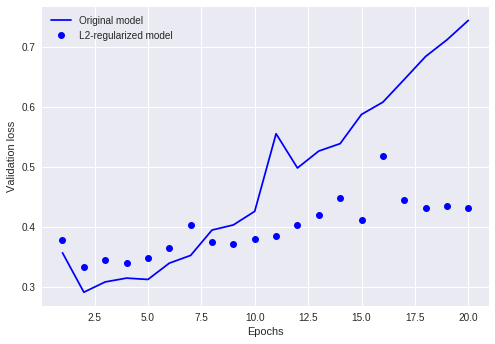

In [46]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [40]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 156us/step - loss: 0.5510 - acc: 0.8181 - val_loss: 0.4356 - val_acc: 0.8620
Epoch 2/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.3690 - acc: 0.8950 - val_loss: 0.3801 - val_acc: 0.8836
Epoch 3/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.3315 - acc: 0.9063 - val_loss: 0.3759 - val_acc: 0.8823
Epoch 4/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.3193 - acc: 0.9092 - val_loss: 0.3622 - val_acc: 0.8874
Epoch 5/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.3067 - acc: 0.9147 - val_loss: 0.3845 - val_acc: 0.8769
Epoch 6/20
25000/25000 [==============================] - 3s 133us/step - loss: 0.3003 - acc: 0.9182 - val_loss: 0.3713 - val_acc: 0.8850
Epoch 7/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.2925 - acc: 0.9200 - val_loss: 0.3705 - 

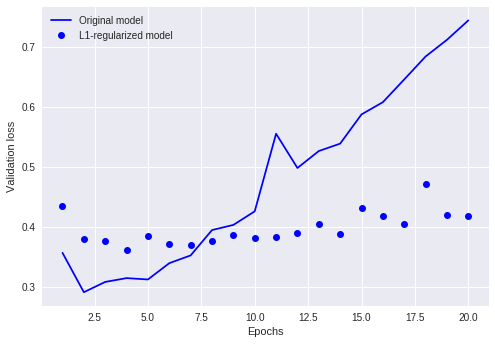

In [47]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [44]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 158us/step - loss: 0.5664 - acc: 0.8176 - val_loss: 0.4531 - val_acc: 0.8545
Epoch 2/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.3821 - acc: 0.8926 - val_loss: 0.3794 - val_acc: 0.8847
Epoch 3/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.3409 - acc: 0.9028 - val_loss: 0.3640 - val_acc: 0.8892
Epoch 4/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.3218 - acc: 0.9090 - val_loss: 0.3616 - val_acc: 0.8881
Epoch 5/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.3134 - acc: 0.9111 - val_loss: 0.3694 - val_acc: 0.8852
Epoch 6/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.3065 - acc: 0.9141 - val_loss: 0.3667 - val_acc: 0.8851
Epoch 7/20
25000/25000 [==============================] - 3s 137us/step - loss: 0.3021 - acc: 0.9167 - val_loss: 0.3727 - 

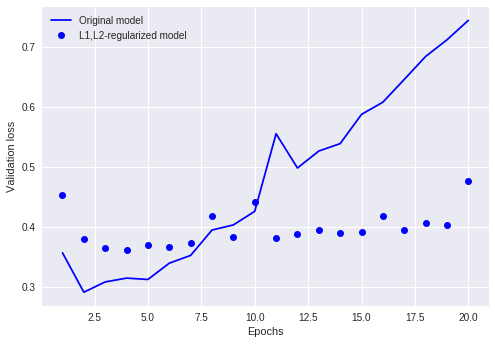

In [48]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## 드롭아웃 추가

드롭아웃은 토론토 대학의 제프리 힌튼과 그의 학생들이 개발했습니다. 신경망을 위해 사용되는 규제 기법 중에서 가장 효과적이고 널리 사용되는 방법 중에 하나입니다. 네트워크의 층에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 출력 특성을 제외시킵니다(0으로 만듭니다). 한 층이 정상적으로 훈련하는 동안에는 어떤 입력 샘플에 대해 `[0.2, 0.5, 1.3, 0.8, 1.1]` 벡터를 출력한다고 가정합시다. 드롭아웃을 적용하면 이 벡터의 일부가 무작위로 0으로 바뀝니다. 예를 들면 `[0, 0.5, 1.3, 0, 1.1]`이 됩니다. 드롭아웃 비율은 0이 될 특성의 비율입니다. 보통 0.2에서 0.5 사이로 지정됩니다. 테스트 단계에서는 어떤 유닛도 드롭아웃되지 않습니다. 대신에 층의 출력을 드롭아웃 비율에 비례하여 줄여 줍니다. 훈련할 때보다 더 많은 유닛이 활성화되기 때문입니다.

크기가 `(batch_size, features)`인 한 층의 출력을 담고 있는 넘파이 행렬을 생각해 보겠습니다. 훈련할 때는 이 행렬의 값의 일부가 랜덤하게 0이 됩니다:

In [49]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [50]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 152us/step - loss: 0.5934 - acc: 0.6733 - val_loss: 0.4664 - val_acc: 0.8508
Epoch 2/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.4437 - acc: 0.8196 - val_loss: 0.3515 - val_acc: 0.8808
Epoch 3/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.3626 - acc: 0.8702 - val_loss: 0.3045 - val_acc: 0.8857
Epoch 4/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.3075 - acc: 0.8952 - val_loss: 0.2858 - val_acc: 0.8879
Epoch 5/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.2630 - acc: 0.9118 - val_loss: 0.2855 - val_acc: 0.8864
Epoch 6/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.2343 - acc: 0.9230 - val_loss: 0.2933 - val_acc: 0.8850
Epoch 7/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.2077 - acc: 0.9331 - val_loss: 0.3103 - 

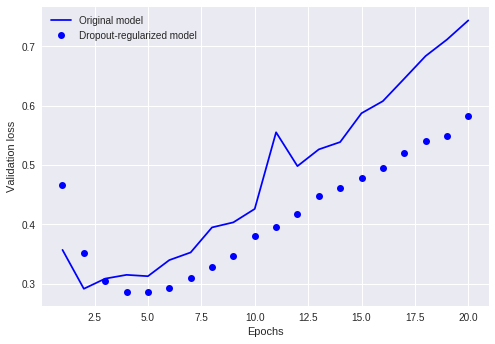

In [52]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [0]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001), activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001), activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [54]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 165us/step - loss: 0.6970 - acc: 0.6724 - val_loss: 0.5295 - val_acc: 0.8638
Epoch 2/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.5266 - acc: 0.8118 - val_loss: 0.4264 - val_acc: 0.8777
Epoch 3/20
25000/25000 [==============================] - 3s 133us/step - loss: 0.4558 - acc: 0.8525 - val_loss: 0.3939 - val_acc: 0.8776
Epoch 4/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.4147 - acc: 0.8788 - val_loss: 0.3642 - val_acc: 0.8860
Epoch 5/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.3913 - acc: 0.8893 - val_loss: 0.3613 - val_acc: 0.8862
Epoch 6/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.3740 - acc: 0.8968 - val_loss: 0.3637 - val_acc: 0.8860
Epoch 7/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.3635 - acc: 0.9013 - val_loss: 0.3714 - 

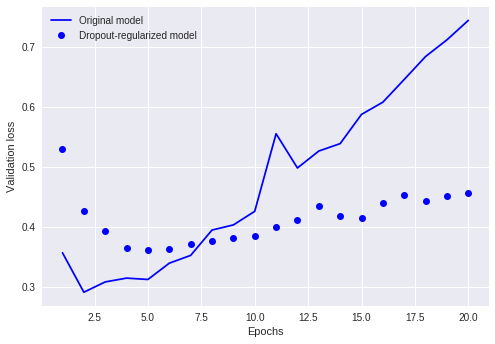

In [55]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()